In [6]:
import textwrap
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import defaultdict

In [7]:
file = 'data.csv'
data = pd.read_csv(file)

data.head()

,Carimbo de data/hora,Anos de Experiência,Tamanho Médio da Equipe,Tempo de Mercado da Startup,Cargo,Fonte de Requisitos,Análise de Documentos,Brainstorming,Entrevistas,Observação,...,Testes de Usuário,Repetição da Descoberta,Esse processo é feito mais de uma vez?,Frequência de solicitações de mudança,Origem das solicitações de mudança,Metodologia de gerenciamento,Criterios de análise de solicitação de mudança,Critérios Dimensões,Consequências da solicitação de mudanças,Comentários
0,09/11/2023 11:29:59,18,3,5,CTO,"Clientes, Time de Marketing, Time de Produto",Sempre,Frequentemente,Sempre,Às Vezes,...,Às Vezes,Frequentemente,Sim,Sempre,"Desenvolvedores, Product Owners, Stakeholders,...","Kanban, Scrum","Contrato, Custo, Prazos","Contrato, Custos, Prazos","Análise de Impacto, Avaliação de Risco, Implem...",Foquei as respostas nos produtos de software q...
1,23/11/2023 09:35:08,3,13,3,Product Owner,"Usuários, Time de Desenvolvimento, Time de Des...",Sempre,Sempre,Frequentemente,Sempre,...,Frequentemente,Frequentemente,Sim,Raramente,Product Owners,"Kanban, Scrum",Não há critérios específicos pois raramente ac...,"Escopo, Valor para o Negócio, Necessidade do C...",Avaliação de Risco,NaN
2,23/11/2023 09:39:45,2,4,2,Product Manager,Stakeholders,Às Vezes,Sempre,Frequentemente,Frequentemente,...,Sempre,Sempre,Sim,Raramente,"Stakeholders, Usuários Finais",Scrum,Mudança no negócio,Valor para o Negócio,"Revisão do Projeto, Revisão da Sprint",NaN
3,23/11/2023 10:06:54,3,5,2,Product Manager,Diretoria,Sempre,Às Vezes,Frequentemente,Sempre,...,Às Vezes,Às Vezes,Às vezes,Sempre,Stakeholders,Scrum,Análise de Indicadores,Métricas do Negócio,"Análise de Impacto, Revisão da Sprint, Impleme...",NaN
4,28/11/2023 09:43:29,20,20,60,Analista de Sistemas,"Time de Operações, Time Comercial, Time Financ...",Às Vezes,Frequentemente,Sempre,Frequentemente,...,Às Vezes,Às Vezes,Às vezes,Frequentemente,Desenvolvedores,Scrum,"Prazos, Custo, Viabilidade","Prazos, Custos, Prazos","Análise de Impacto, Avaliação de Risco, Revisã...",A mudanças não necessárias e precisam ser aval...


In [8]:
data.columns

Index(['Carimbo de data/hora', 'Anos de Experiência',
       'Tamanho Médio da Equipe', 'Tempo de Mercado da Startup', 'Cargo',
       'Fonte de Requisitos', 'Análise de Documentos', 'Brainstorming',
       'Entrevistas', 'Observação', 'Prototipação', 'Surveys', 'Workshops',
       'Especificação de Requisitos', 'Validação de Requisitos',
       'Contato com stakeholder durante descoberta', 'Ciclos de Feedback',
       'Testes de Usuário', 'Repetição da Descoberta',
       'Esse processo é feito mais de uma vez?',
       'Frequência de solicitações de mudança',
       'Origem das solicitações de mudança', 'Metodologia de gerenciamento',
       'Criterios de análise de solicitação de mudança', 'Critérios Dimensões',
       'Consequências da solicitação de mudanças', 'Comentários'],
      dtype='object')

### Fontes dos Requisitos

In [9]:
fontes = data['Fonte de Requisitos'].str.split(', ')
fontes_contagem = fontes.explode().value_counts()
# fontes_contagem.to_csv('fontes_contagem.csv')
# fontes_contagem

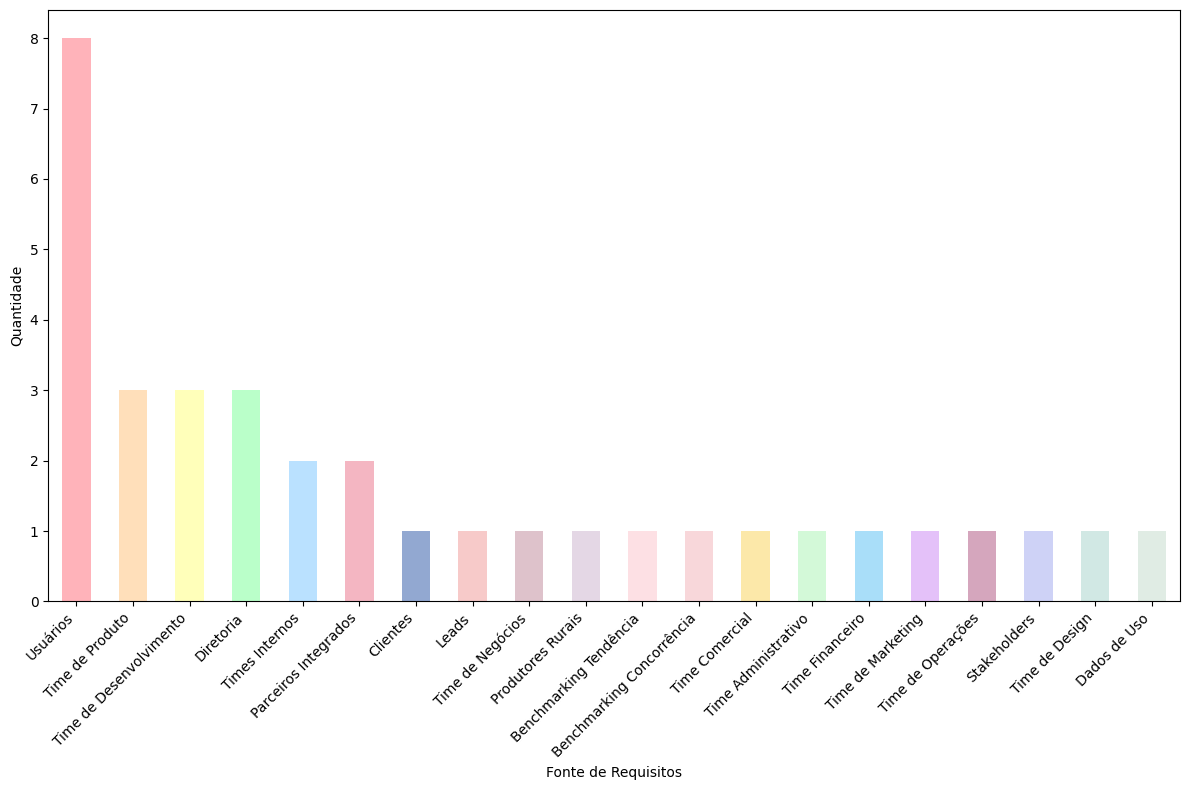

In [10]:
pastel_colors = ['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9', '#bae1ff',
                 '#f4b6c2', '#92a8d1', '#f7cac9', '#dec2cb', '#e4d7e5',
                 '#fde0e4', '#f8d7da', '#fce8a9', '#d3f9d8', '#a9def9',
                 '#e4c1f9', '#d5a6bd', '#ced2f6', '#d1e8e4', '#e0ece4']

color_cycle = pastel_colors * (len(fontes_contagem) // len(pastel_colors) + 1)
colors = color_cycle[:len(fontes_contagem)]

fig, ax = plt.subplots(figsize=(12, 8))
fontes_contagem.plot(kind='bar', color=colors)
# plt.title('Frequência de Técnicas de Fontes de Requisitos')
# plt.xlabel('Técnicas')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('plots/q3/fontes.png', transparent=True)
plt.show()

### Frequência de Contato com a Fonte

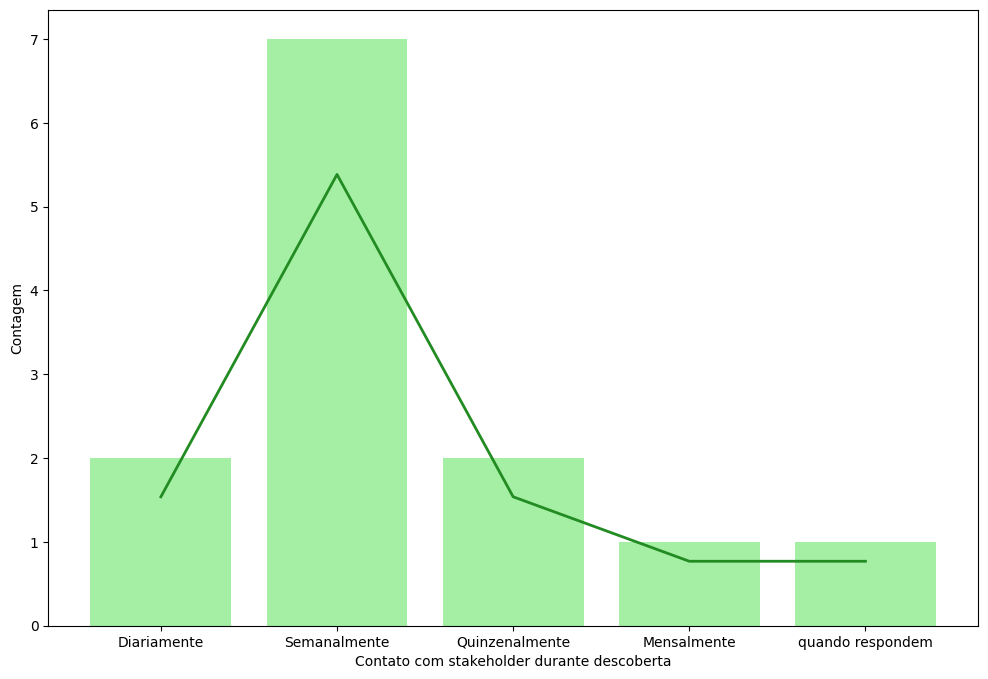

In [57]:
order = ['Diariamente', 'Semanalmente', 'Quinzenalmente', 'Mensalmente', 'quando respondem']

plt.figure(figsize=(12, 8))

sns.countplot(x=data['Contato com stakeholder durante descoberta'],
              order=order,
              color='palegreen')

# Calculando a densidade
density = data['Contato com stakeholder durante descoberta'].value_counts(normalize=True)

# Ajustando a altura da curva de densidade
density *= 10  # Você pode ajustar o fator conforme desejado

# Traçando a curva de densidade sobre o histograma normalizado
sns.lineplot(x=density.index, y=density.values, color='#228B22', linewidth=2)

# plt.xlabel('Frequência')
plt.ylabel('Contagem')
plt.savefig('plots/q3/frequencia_contato.png', transparent=True)
plt.show()

### Descoberta Clusterizada por Frequência

In [58]:
tecnicas_descoberta = ['Análise de Documentos',
                       'Brainstorming',
                       'Entrevistas',
                       'Observação',
                       'Prototipação',
                       'Surveys',
                       'Workshops']

coluna_recorrencia = 'Contato com stakeholder durante descoberta'

In [59]:
valores_recorrencia = data[coluna_recorrencia].unique()

frequencia_por_recorrencia = defaultdict(lambda: defaultdict(int))

for valor in valores_recorrencia:
    dado_filtrado = data[data[coluna_recorrencia] == valor]
    contador_frequencia = {col: dado_filtrado[col].value_counts() for col in tecnicas_descoberta}
    frequencia_por_recorrencia[valor] = contador_frequencia
    
linhas = []

for recorrencia, tecnica in frequencia_por_recorrencia.items():
    for technique, frequencies in tecnica.items():
        for response, frequency in frequencies.items():
            linhas.append({
                'Recorrencia': recorrencia,
                'Tecnica': technique,
                'Frequencia': response,
                'Quantidade': frequency
            })

frequencias = pd.DataFrame(linhas, columns=['Recorrencia', 'Tecnica', 'Frequencia', 'Quantidade'])
frequencias = frequencias.fillna(0)
frequencias = frequencias.sort_values(by=['Recorrencia', 'Tecnica'])
frequencias.head()

,Recorrencia,Tecnica,Frequencia,Quantidade
39,Diariamente,Análise de Documentos,Sempre,1
40,Diariamente,Análise de Documentos,Frequentemente,1
41,Diariamente,Brainstorming,Sempre,1
42,Diariamente,Brainstorming,Raramente,1
43,Diariamente,Entrevistas,Sempre,2


In [60]:
# Filtrando as duas técnicas mais e menos utilizadas para cada recorrência
tabela_final = pd.DataFrame(columns=['Recorrencia', 'Tecnica', 'Frequencia', 'Quantidade'])

for recorrencia in frequencias['Recorrencia'].unique():
    # Filtrando para a recorrência específica
    subset = frequencias[frequencias['Recorrencia'] == recorrencia]
    
    # Filtrando as duas técnicas mais utilizadas (Frequentemente ou Sempre)
    mais_utilizadas = subset[subset['Frequencia'].isin(['Frequentemente', 'Sempre'])].nlargest(2, 'Quantidade')
    
    # Concatenando com o DataFrame final
    tabela_final = pd.concat([tabela_final, mais_utilizadas])

# Ordenando a tabela final
tabela_final = tabela_final.sort_values(by=['Recorrencia', 'Tecnica', 'Frequencia'])

tabela_final.head(10)

,Recorrencia,Tecnica,Frequencia,Quantidade
43,Diariamente,Entrevistas,Sempre,2
44,Diariamente,Observação,Sempre,2
58,Mensalmente,Análise de Documentos,Sempre,1
60,Mensalmente,Entrevistas,Frequentemente,1
0,Quinzenalmente,Análise de Documentos,Sempre,1
2,Quinzenalmente,Brainstorming,Frequentemente,1
19,Semanalmente,Brainstorming,Frequentemente,3
26,Semanalmente,Observação,Sempre,5
52,quando respondem,Brainstorming,Sempre,1
56,quando respondem,Surveys,Frequentemente,1


### Validação Clusterizada por Frequência

In [74]:
colunas_interesse = ['Validação de Requisitos',
                     'Contato com stakeholder durante descoberta']

data_filtrada = data[colunas_interesse]

data_filtrada['Validação de Requisitos'] = data_filtrada['Validação de Requisitos'].str.split(', ')

dados_organizados = pd.DataFrame({
    'frequencia': data_filtrada['Contato com stakeholder durante descoberta'],
    'tecnica': data_filtrada['Validação de Requisitos']
}).explode('tecnica').value_counts().reset_index(name='quantidade')

dados_organizados.columns = ['frequencia', 'tecnica', 'quantidade']

top3_tecnicas = dados_organizados.groupby('frequencia').apply(lambda x: x.nlargest(3, 'quantidade')).reset_index(drop=True)

order = ['Diariamente', 'Semanalmente', 'Quinzenalmente', 'Mensalmente', 'quando respondem']

top3_tecnicas['frequencia'] = pd.Categorical(top3_tecnicas['frequencia'], categories=order, ordered=True)

top3_tecnicas = top3_tecnicas.sort_values('frequencia')

top3_tecnicas.head(15)

/var/folders/kr/0wtlfsjx58j82_v81f5hkqsr0000gn/T/ipykernel_3379/836140300.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrada['Validação de Requisitos'] = data_filtrada['Validação de Requisitos'].str.split(', ')


,frequencia,tecnica,quantidade
0,Diariamente,Entrevistas,2
1,Diariamente,Reuniões,2
2,Diariamente,Demonstração de Protótipo,2
9,Semanalmente,Demonstração de Protótipo,7
10,Semanalmente,Walkthrough,4
11,Semanalmente,Reuniões,4
6,Quinzenalmente,Demonstração de Protótipo,2
7,Quinzenalmente,Reuniões,2
8,Quinzenalmente,Walkthrough,1
3,Mensalmente,Reuniões,1


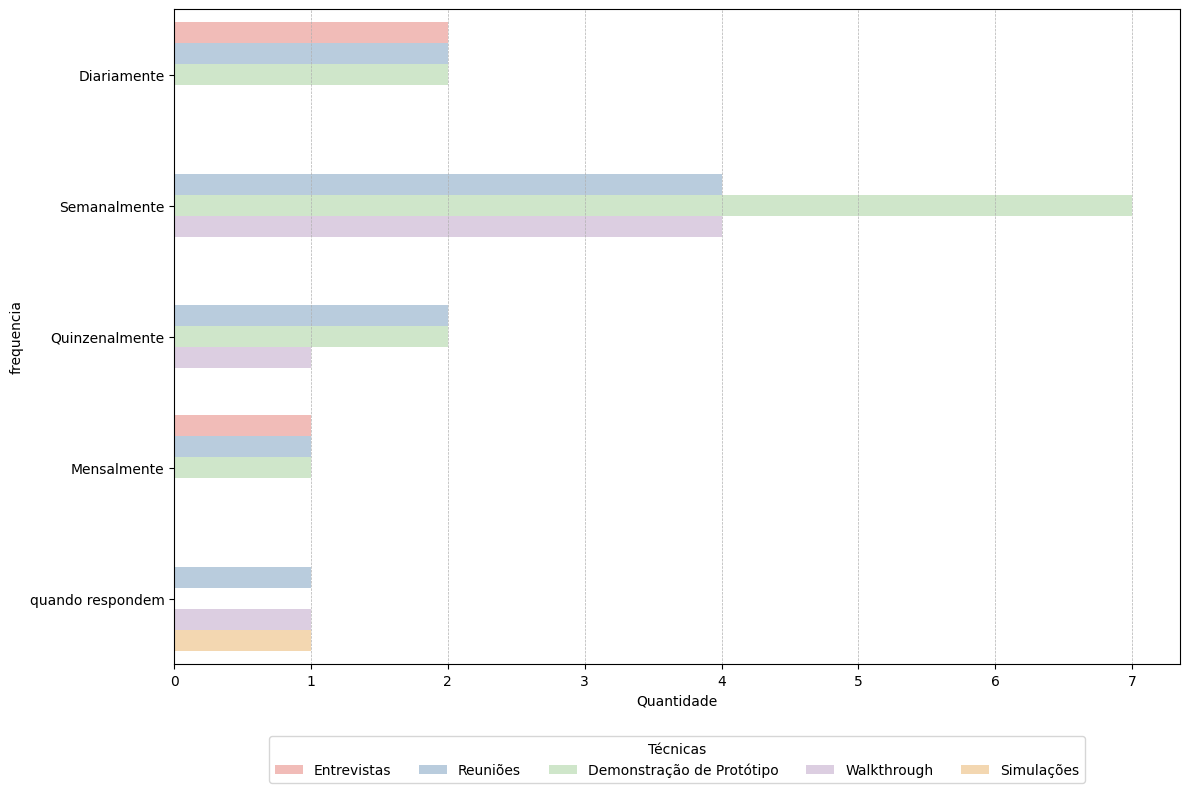

In [91]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top3_tecnicas, x='quantidade', y='frequencia', hue='tecnica', palette='Pastel1')
plt.xlabel('Quantidade')
# plt.ylabel('Frequência')
plt.legend(title='Técnicas', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=5)
plt.grid(axis='x', linestyle='--', linewidth=0.5)  # Add grid only on the x-axis

plt.tight_layout()
plt.savefig('plots/q3/top3_validacao.png', transparent=True)
plt.show()

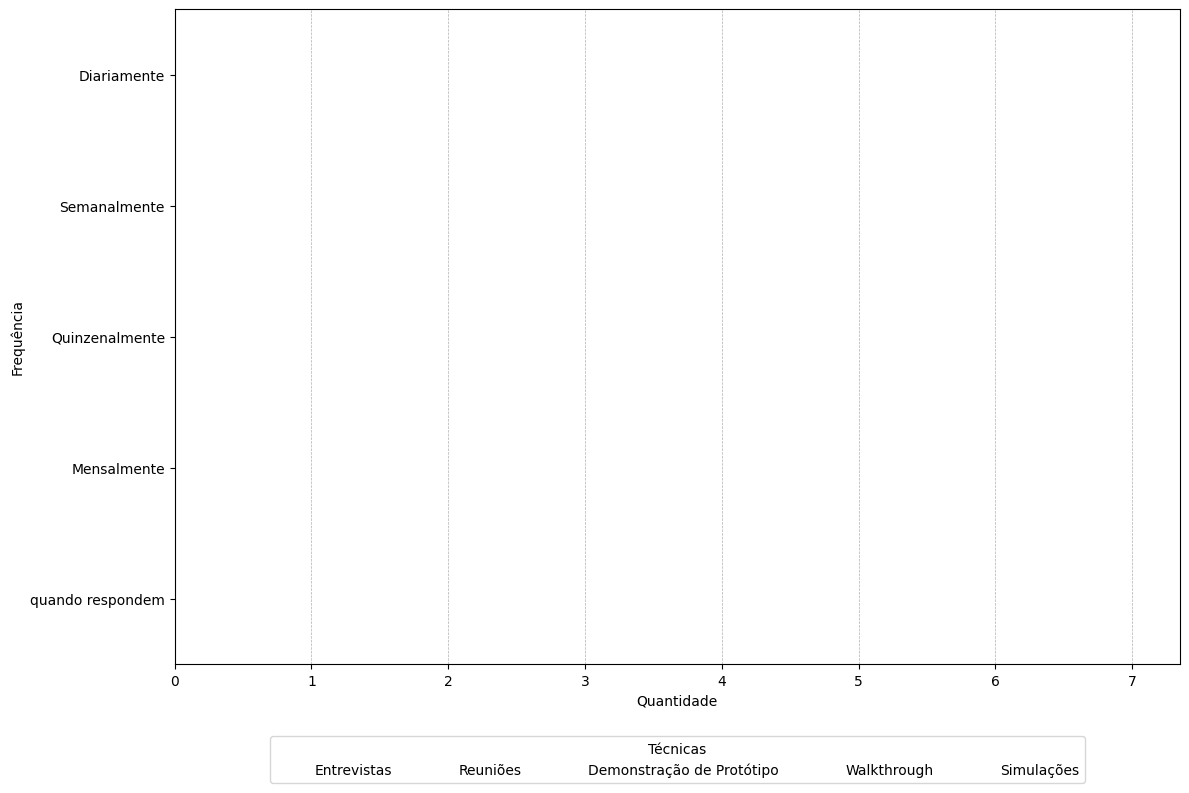

In [92]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top3_tecnicas, x='quantidade', y='frequencia', hue='tecnica', palette='Pastel1', alpha=0)
plt.xlabel('Quantidade')
plt.ylabel('Frequência')
plt.legend(title='Técnicas', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=5)
plt.grid(axis='x', linestyle='--', linewidth=0.5)  # Add grid only on the x-axis

plt.tight_layout()
plt.savefig('plots/q3/back.png', transparent=True)
plt.show()